In [1]:
import hmclab
import matplotlib.pyplot as plt
import numpy

/Users/larsgebraad/.conda/envs/hmclab-dev/lib/python3.8/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
prior_1 = hmclab.Distributions.Normal(
    means=[3, 3],
    covariance=[0.4,0.1],
)
prior_1_l = hmclab.Distributions.TransformToLogSpace(prior_1)


In [3]:
m1 = numpy.array([[100.0],[100.0]])
m2 = numpy.array([[101.0],[1001.0]])
m1t = prior_1_l.transform_forward(m1)

assert numpy.allclose(m1, prior_1_l.transform_backward(m1t))

m1t

array([[2.],
       [2.]])

In [4]:
prior_1_l.gradient(m2)

array([[-0.00080242],
       [ 0.00100088]])

In [5]:
eta = 1e-2
m2e = m2.copy()
m2e[0] += eta

grad1 = (prior_1_l.misfit(m2e) - prior_1_l.misfit(m2)) / eta

m2e = m2.copy()
m2e[1] += eta

grad2 = (prior_1_l.misfit(m2e) - prior_1_l.misfit(m2)) / eta

grad1, grad2

(-0.000802148319323237, 0.0010008887025847457)

In [58]:
sampler_rwmh = hmclab.Samplers.RWMH()

sampler_rwmh.sample(
    "bin_samples/tutorial_5_rwmh.h5",
    prior_1_l,
    stepsize=100.0,
    initial_model=m1,
    overwrite_existing_file=True,
    online_thinning=1,
    autotuning=True,
    proposals=1000000,
    max_time=1.0,
)

sampler_hmc = hmclab.Samplers.HMC()

sampler_hmc.sample(
    "bin_samples/tutorial_5_hmc.h5",
    prior_1_l,
    stepsize=100.0,
    initial_model=m1,
    overwrite_existing_file=True,
    online_thinning=1,
    amount_of_steps=3,
    autotuning=True,
    proposals=10000,
    max_time=1.0,
)


Tot. acc rate: 0.90. Progress:   3%|▎         | 30957/1000000 [00:01<00:31, 30944.84it/s]


Tot. acc rate: 0.94. Progress:  94%|█████████▍| 9442/10000 [00:01<00:00, 9439.18it/s]


In [59]:
samples_rwmh = sampler_rwmh.load_results()
samples_hmc = sampler_hmc.load_results()


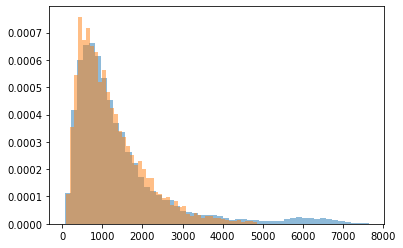

In [60]:
_ = plt.hist(samples_rwmh[1,:], bins=50,alpha=0.5,density=True)
_ = plt.hist(samples_hmc[1,:], bins=50,alpha=0.5,density=True)

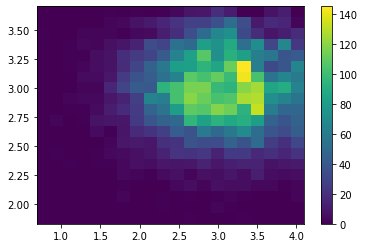

In [36]:
transform_samples = prior_1_l.transform_forward(samples[:-1,:])

_ = plt.hist2d(transform_samples[0,:], transform_samples[1,:],bins=20)
plt.colorbar()

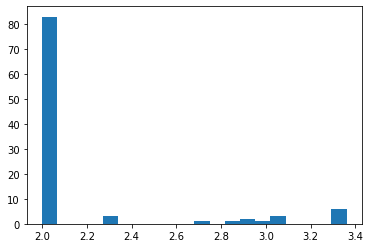

In [20]:
_ = plt.hist(transform_samples[1,:].flatten(), bins=20)